In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import os

In [2]:
csvpath = os.path.join('output', 'best_picture_noms.csv')
revenue_budget = pd.read_csv(csvpath)

In [3]:
revenue_budget

,Unnamed: 0,Release Date,Title,Genre,Runtime,Budget,Revenue
0,0,1950-10-06,All About Eve,Drama,139.0,1400000.0,1.504380e+05
1,1,1950-12-25,Born Yesterday,Comedy,103.0,0.0,0.000000e+00
2,2,1991-12-20,Father of the Bride,Comedy,105.0,0.0,8.932578e+07
3,3,1985-11-22,King Solomon's Mines,Action,100.0,12500000.0,2.382270e+05
4,4,2019-12-19,Ed Ruscha - Motorized Photographs of Sunset Bl...,Documentary,2.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...
385,385,2019-10-18,Jojo Rabbit,Comedy,108.0,14000000.0,8.246870e+07
386,386,2019-10-02,Joker,Crime,122.0,55000000.0,1.074251e+09
387,388,2019-11-06,Marriage Story,Drama,137.0,19000000.0,2.300000e+06
388,389,2019-12-25,1917,War,119.0,100000000.0,3.747339e+08


In [4]:
revenue_budget.describe()

,Unnamed: 0,Runtime,Budget,Revenue
count,390.000000,390.000000,3.900000e+02,3.900000e+02
mean,194.507692,130.010256,2.737587e+07,1.579061e+08
std,112.740819,27.803477,4.207850e+07,2.777375e+08
min,0.000000,2.000000,0.000000e+00,0.000000e+00
25%,97.250000,112.000000,2.300000e+06,1.843159e+07
50%,194.500000,125.500000,1.225000e+07,6.629238e+07
75%,291.750000,142.000000,3.000000e+07,1.792134e+08
max,390.000000,248.000000,2.600000e+08,2.787965e+09


In [5]:
revenue_budget[['Title', 'Budget', 'Revenue']].head()

,Title,Budget,Revenue
0,All About Eve,1400000.0,150438.0
1,Born Yesterday,0.0,0.0
2,Father of the Bride,0.0,89325780.0
3,King Solomon's Mines,12500000.0,238227.0
4,Ed Ruscha - Motorized Photographs of Sunset Bl...,0.0,0.0


In [6]:
sorted_df = revenue_budget.sort_values("Revenue", ascending=False)
sorted_df

,Unnamed: 0,Release Date,Title,Genre,Runtime,Budget,Revenue
293,293,2009-12-10,Avatar,Action,162.0,237000000.0,2.787965e+09
237,237,1997-11-18,Titanic,Drama,194.0,200000000.0,2.187464e+09
362,362,2019-07-12,The Lion King,Adventure,118.0,260000000.0,1.656943e+09
375,375,2018-02-13,Black Panther,Action,134.0,200000000.0,1.346739e+09
204,204,2017-03-16,Beauty and the Beast,Family,129.0,160000000.0,1.263521e+09
...,...,...,...,...,...,...,...
12,12,1952-01-01,Ivanhoe,Adventure,106.0,0.0,0.000000e+00
1,1,1950-12-25,Born Yesterday,Comedy,103.0,0.0,0.000000e+00
172,172,1984-09-11,Places in the Heart,Drama,111.0,0.0,0.000000e+00
168,168,1983-11-20,Terms of Endearment,Comedy,132.0,8000000.0,0.000000e+00


In [7]:
sorted_df = sorted_df.loc[( 
    sorted_df['Revenue'] > 0)]
sorted_df

,Unnamed: 0,Release Date,Title,Genre,Runtime,Budget,Revenue
293,293,2009-12-10,Avatar,Action,162.0,237000000.0,2.787965e+09
237,237,1997-11-18,Titanic,Drama,194.0,200000000.0,2.187464e+09
362,362,2019-07-12,The Lion King,Adventure,118.0,260000000.0,1.656943e+09
375,375,2018-02-13,Black Panther,Action,134.0,200000000.0,1.346739e+09
204,204,2017-03-16,Beauty and the Beast,Family,129.0,160000000.0,1.263521e+09
...,...,...,...,...,...,...,...
3,3,1985-11-22,King Solomon's Mines,Action,100.0,12500000.0,2.382270e+05
0,0,1950-10-06,All About Eve,Drama,139.0,1400000.0,1.504380e+05
8,8,1951-11-08,Quo Vadis,Drama,171.0,7623000.0,1.014860e+05
127,127,1975-06-11,Nashville,Drama,160.0,2200000.0,1.000000e+01


In [8]:
sorted_df = sorted_df.loc[( 
    sorted_df['Budget'] > 0)]
sorted_df

,Unnamed: 0,Release Date,Title,Genre,Runtime,Budget,Revenue
293,293,2009-12-10,Avatar,Action,162.0,237000000.0,2.787965e+09
237,237,1997-11-18,Titanic,Drama,194.0,200000000.0,2.187464e+09
362,362,2019-07-12,The Lion King,Adventure,118.0,260000000.0,1.656943e+09
375,375,2018-02-13,Black Panther,Action,134.0,200000000.0,1.346739e+09
204,204,2017-03-16,Beauty and the Beast,Family,129.0,160000000.0,1.263521e+09
...,...,...,...,...,...,...,...
3,3,1985-11-22,King Solomon's Mines,Action,100.0,12500000.0,2.382270e+05
0,0,1950-10-06,All About Eve,Drama,139.0,1400000.0,1.504380e+05
8,8,1951-11-08,Quo Vadis,Drama,171.0,7623000.0,1.014860e+05
127,127,1975-06-11,Nashville,Drama,160.0,2200000.0,1.000000e+01


In [9]:
sorted_df['Profit'] = sorted_df['Revenue'] - sorted_df['Budget']
sorted_df

C:\Users\anich\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Release Date,Title,Genre,Runtime,Budget,Revenue,Profit
293,293,2009-12-10,Avatar,Action,162.0,237000000.0,2.787965e+09,2.550965e+09
237,237,1997-11-18,Titanic,Drama,194.0,200000000.0,2.187464e+09,1.987464e+09
362,362,2019-07-12,The Lion King,Adventure,118.0,260000000.0,1.656943e+09,1.396943e+09
375,375,2018-02-13,Black Panther,Action,134.0,200000000.0,1.346739e+09,1.146739e+09
204,204,2017-03-16,Beauty and the Beast,Family,129.0,160000000.0,1.263521e+09,1.103521e+09
...,...,...,...,...,...,...,...,...
3,3,1985-11-22,King Solomon's Mines,Action,100.0,12500000.0,2.382270e+05,-1.226177e+07
0,0,1950-10-06,All About Eve,Drama,139.0,1400000.0,1.504380e+05,-1.249562e+06
8,8,1951-11-08,Quo Vadis,Drama,171.0,7623000.0,1.014860e+05,-7.521514e+06
127,127,1975-06-11,Nashville,Drama,160.0,2200000.0,1.000000e+01,-2.199990e+06


In [10]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = sorted_df['Revenue'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


outlier_occupancy = sorted_df.loc[(sorted_df['Revenue'] < lower_bound) | (sorted_df['Revenue'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 35946165.0
The upper quartile of occupancy is: 228316113.0
The interquartile range of occupancy is: 192369948.0
The the median of occupancy is: 100523181.0 
Values below -252608757.0 could be outliers.
Values above 516871035.0 could be outliers.


,Unnamed: 0,Release Date,Title,Genre,Runtime,Budget,Revenue,Profit
293,293,2009-12-10,Avatar,Action,162.0,237000000.0,2.787965e+09,2.550965e+09
237,237,1997-11-18,Titanic,Drama,194.0,200000000.0,2.187464e+09,1.987464e+09
362,362,2019-07-12,The Lion King,Adventure,118.0,260000000.0,1.656943e+09,1.396943e+09
375,375,2018-02-13,Black Panther,Action,134.0,200000000.0,1.346739e+09,1.146739e+09
204,204,2017-03-16,Beauty and the Beast,Family,129.0,160000000.0,1.263521e+09,1.103521e+09
263,263,2003-12-01,The Lord of the Rings: The Return of the King,Adventure,201.0,94000000.0,1.118889e+09,1.024889e+09
386,386,2019-10-02,Joker,Crime,122.0,55000000.0,1.074251e+09,1.019251e+09
310,310,2010-06-16,Toy Story 3,Animation,103.0,200000000.0,1.066970e+09,8.669697e+08
261,261,2002-12-18,The Lord of the Rings: The Two Towers,Adventure,179.0,79000000.0,9.262874e+08,8.472874e+08
377,377,2018-10-24,Bohemian Rhapsody,Drama,135.0,52000000.0,8.940275e+08,8.420275e+08


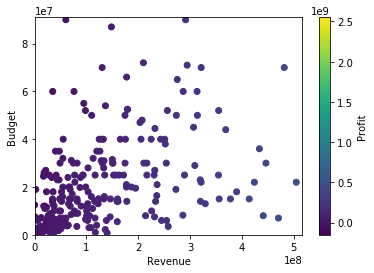

In [11]:
plt.xlim(0, 516871035)
plt.ylim(0, 91000000 )


plt.scatter(sorted_df['Revenue'],sorted_df['Budget'],c=sorted_df['Profit'])
clb = plt.colorbar()
plt.xlabel("Revenue")
plt.ylabel("Budget")
plt.title("Movie Profit")
clb.set_label("Profit")
plt.show()
plt.savefig('Output/Movie_Profit.png')

In [12]:
genre_profit = sorted_df.groupby('Genre')
genre_sum = genre_profit['Profit'].sum()
genre_sum

Genre
Action             5.692509e+09
Adventure          7.366899e+09
Animation          1.353318e+09
Comedy             4.739665e+09
Crime              2.334696e+09
Drama              1.953109e+10
Family             1.103521e+09
Fantasy            1.458590e+09
History            8.730406e+08
Horror             8.969591e+08
Mystery            6.328063e+08
Romance            2.097986e+08
Science Fiction    1.605867e+09
Thriller           7.354199e+08
War                1.226465e+09
Western            5.625068e+08
Name: Profit, dtype: float64

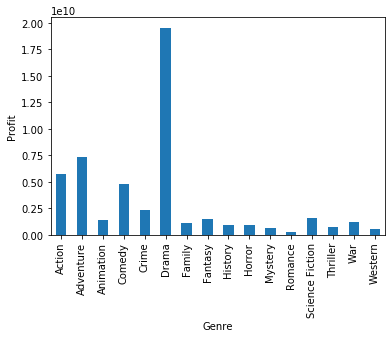

In [14]:
profit_genre = genre_sum.plot(kind='bar')
profit_genre.set_xlabel('Genre')
profit_genre.set_ylabel('Profit')
plt.show()

In [15]:
genre_profit_mean = sorted_df.groupby('Genre')
genre_mean = genre_profit['Profit'].mean()
genre_mean

Genre
Action             3.557818e+08
Adventure          4.092722e+08
Animation          4.511061e+08
Comedy             1.394019e+08
Crime              1.015085e+08
Drama              1.091123e+08
Family             1.103521e+09
Fantasy            2.083701e+08
History            1.455068e+08
Horror             4.484796e+08
Mystery            6.328063e+08
Romance            5.244966e+07
Science Fiction    4.014667e+08
Thriller           1.225700e+08
War                2.452929e+08
Western            9.375113e+07
Name: Profit, dtype: float64

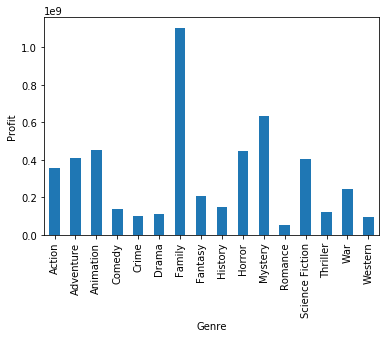

<Figure size 432x288 with 0 Axes>

In [16]:
genre_profit_mean = genre_mean.plot(kind='bar')
genre_profit_mean.set_xlabel('Genre')
genre_profit_mean.set_ylabel('Profit')
plt.show()
plt.title("Average Profit per Genre")
plt.tight_layout()
plt.savefig('Output/Average_Genre_Profit.png')

In [18]:
genre_budget = sorted_df.groupby('Genre')
genre_budget_sum = genre_budget['Budget'].sum()
genre_budget_sum

Genre
Action             1.639300e+09
Adventure          1.233450e+09
Animation          4.750000e+08
Comedy             7.619009e+08
Crime              5.743100e+08
Drama              4.127274e+09
Family             1.600000e+08
Fantasy            4.280000e+08
History            1.750000e+08
Horror             1.500000e+07
Mystery            4.000000e+07
Romance            7.070554e+07
Science Fiction    1.477000e+08
Thriller           1.760000e+08
War                2.668000e+08
Western            3.157300e+08
Name: Budget, dtype: float64

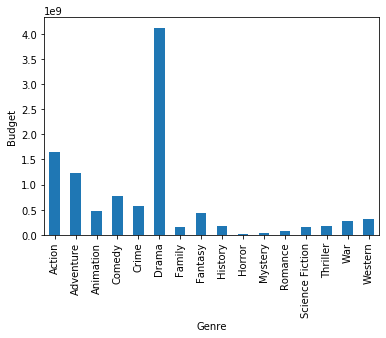

In [19]:
budget_genre = genre_budget_sum.plot(kind='bar')
budget_genre.set_xlabel('Genre')
budget_genre.set_ylabel('Budget')
plt.title("Total Budget per Genre")
plt.show()
plt.savefig('Output/Genre_Total_Budget.png')